# Validating CSHT in WM $\sigma_0$ levels

In [1]:
import cosima_cookbook as cc
from cosima_cookbook import distributed as ccd
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob,os
import cmocean.cm as cmocean
from gsw import sigma0

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client(n_workers=28, memory_limit='190GiB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 5.20 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41583,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 5.20 TiB
Comm: tcp://127.0.0.1:35341,Total threads: 1
Dashboard: /proxy/41903/status,Memory: 190.00 GiB
Nanny: tcp://127.0.0.1:38967,


In [3]:
CSHT_z = xr.open_mfdataset(\
    '/g/data/v45/wf4500/ASC_project_files/Cross_slope_heat_transport/OM2_IAF/daily_z/*')\
.sel(time=slice('1958-01-01','1959-12-31')).resample(time='1M').mean()

CSHT_σ = xr.open_mfdataset(\
    '/g/data/v45/wf4500/ASC_project_files/Cross_slope_heat_transport/OM2_IAF/WMbins_daily_rho/*')\
.sel(time=slice('1958-01-01','1959-12-31')).resample(time='1M').mean()

0.3.0


In [ ]:
CSHT_σmean=CSHT_σ.mean('time')
CSHT_zmean=CSHT_z.mean('time')

In [5]:
#Correction factors
factor_z=CSHT_zmean.unbinned_heat_transp_across_contour.sum()/ (CSHT_zmean.zonal_convergence.sum() + CSHT_zmean.binned_cross_slope_heat_trans.sum())
factor_σ=CSHT_σmean.unbinned_heat_transp_across_contour.sum()/ (CSHT_σmean.zonal_convergence.sum() + CSHT_σmean.binned_cross_slope_heat_trans.sum())



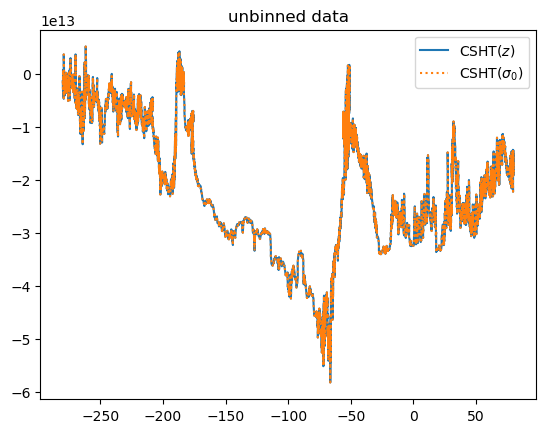

In [6]:
plt.plot(CSHT_zmean.lon_along_contour[0,:],
CSHT_zmean.unbinned_heat_transp_across_contour.sum('st_ocean').cumsum(),label=r'CSHT($z$)')
plt.plot(CSHT_σmean.lon_along_contour,
CSHT_σmean.unbinned_heat_transp_across_contour.sum('potrho0').cumsum(),linestyle=':',label=r'CSHT($\sigma_0$)')

plt.title('unbinned data')
plt.legend()

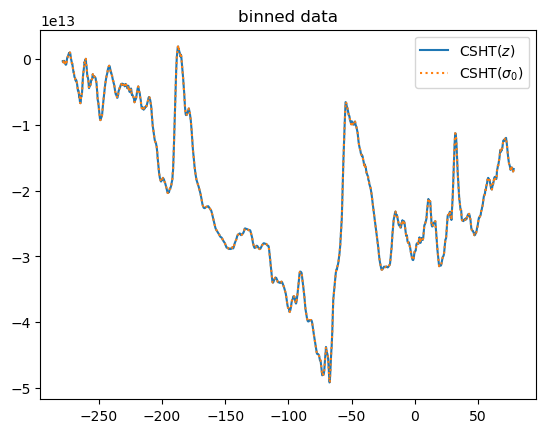

In [7]:
plt.plot(CSHT_zmean.lon_bin_midpoints,
CSHT_zmean.binned_cross_slope_heat_trans.sum('st_ocean').cumsum()*factor_z,label=r'CSHT($z$)')
plt.plot(CSHT_σmean.lon_bin_midpoints,
CSHT_σmean.binned_cross_slope_heat_trans.sum('potrho0').cumsum()*factor_z,linestyle=':',label=r'CSHT($\sigma_0$)')

plt.title('binned data')
plt.legend()

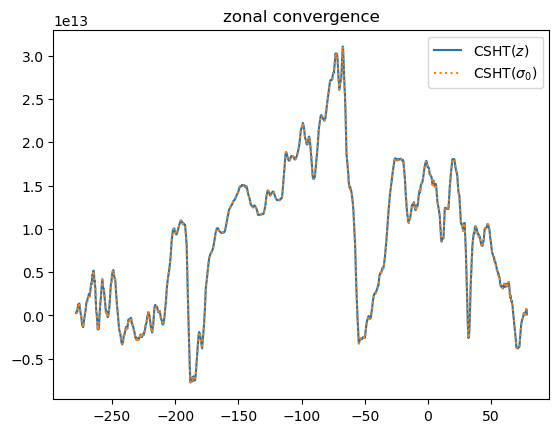

In [8]:
plt.plot(CSHT_zmean.lon_bin_midpoints,
CSHT_zmean.zonal_convergence.sum('st_ocean').cumsum()*factor_z,label=r'CSHT($z$)')
plt.plot(CSHT_σmean.lon_bin_midpoints,
CSHT_σmean.zonal_convergence.sum('potrho0').cumsum()*factor_z,linestyle=':',label=r'CSHT($\sigma_0$)')

plt.title('zonal convergence')
plt.legend()

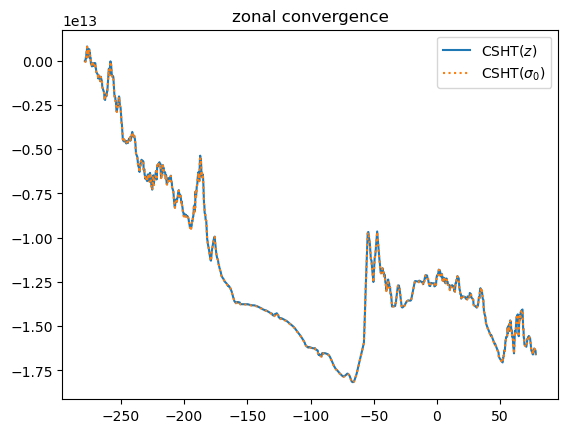

In [10]:
plt.plot(CSHT_zmean.lon_bin_midpoints,
(CSHT_zmean.zonal_convergence + CSHT_zmean.binned_cross_slope_heat_trans).sum('st_ocean').cumsum()*factor_z,label=r'CSHT($z$)')
plt.plot(CSHT_σmean.lon_bin_midpoints,
(CSHT_σmean.zonal_convergence + CSHT_σmean.binned_cross_slope_heat_trans).sum('potrho0').cumsum()*factor_z,linestyle=':',label=r'CSHT($\sigma_0$)')

plt.title('zonal convergence')
plt.legend()

In [12]:
(CSHT_zmean.zonal_convergence + CSHT_zmean.binned_cross_slope_heat_trans).sum().values

array(-1.99440608e+14)

In [13]:
(CSHT_σmean.zonal_convergence + CSHT_σmean.binned_cross_slope_heat_trans).sum().values

array(-1.99686631e+14)

In [19]:
CSHT_σmean.unbinned_heat_transp_across_contour.sum().values

array(-1.65805854e+13)

In [20]:
CSHT_zmean.unbinned_heat_transp_across_contour.sum().values

array(-1.6580567e+13, dtype=float32)